# Generate pandas df from open-meteo.com historical weather API: 
- https://open-meteo.com/en/docs/historical-weather-api
- > 'The Historical Weather API is based on reanalysis datasets and uses a combination of weather station, aircraft, buoy, radar, and satellite observations to create a comprehensive record of past weather conditions. These datasets are able to fill in gaps by using mathematical models to estimate the values of various weather variables. As a result, reanalysis datasets are able to provide detailed historical weather information for locations that may not have had weather stations nearby, such as rural areas or the open ocean.'

In [ ]:
# import libraries
import pandas as pd
import requests
from datetime import datetime
import pytz

In [2]:
# get a timestamp of when we get the data
tz = pytz.timezone('Europe/Berlin')
now = datetime.now().astimezone(tz)

now

datetime.datetime(2023, 3, 27, 17, 50, 14, 805980, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [3]:
# Load dataset for belgium cities from my google drive folder: 
url = 'https://drive.google.com/file/d/1qd4EMFjFShK-11yhdkJ3CI69IwL61L8i/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
belgium_cities = pd.read_csv(path)

In [4]:
# Filter Belgium cities
belgium_cities = belgium_cities.loc[belgium_cities['country'] == 'Belgium']
belgium_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
421,Brussels,Brussels,50.8353,4.3314,Belgium,BE,BEL,Brussels-Capital Region,primary,1743000.0,1056469830
1338,Antwerp,Antwerp,51.2211,4.3997,Belgium,BE,BEL,Flanders,minor,529247.0,1056168623
2298,Gent,Gent,51.0536,3.7253,Belgium,BE,BEL,Flanders,minor,262219.0,1056062897
2804,Charleroi,Charleroi,50.4167,4.4442,Belgium,BE,BEL,Wallonia,minor,201816.0,1056263311
2859,Liège,Liege,50.6397,5.5706,Belgium,BE,BEL,Wallonia,minor,196623.0,1056513284
...,...,...,...,...,...,...,...,...,...,...,...
41530,Chiny,Chiny,49.7383,5.3433,Belgium,BE,BEL,Wallonia,NaN,5175.0,1056542075
41579,Libin,Libin,49.9828,5.2578,Belgium,BE,BEL,Wallonia,NaN,5164.0,1056311682
41630,Ohey,Ohey,50.4353,5.1217,Belgium,BE,BEL,Wallonia,NaN,5090.0,1056175337
41632,Havelange,Havelange,50.3833,5.2500,Belgium,BE,BEL,Wallonia,NaN,5130.0,1056076488


In [5]:
belgium_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 421 to 41704
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        468 non-null    object 
 1   city_ascii  468 non-null    object 
 2   lat         468 non-null    float64
 3   lng         468 non-null    float64
 4   country     468 non-null    object 
 5   iso2        468 non-null    object 
 6   iso3        468 non-null    object 
 7   admin_name  468 non-null    object 
 8   capital     46 non-null     object 
 9   population  468 non-null    float64
 10  id          468 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 43.9+ KB


In [6]:
# Create a dictionary of all cities with their latitudes and longitudes
var_dict = {}
for i in range(belgium_cities.shape[0]): 
    var_dict[i + 1] = list(belgium_cities[['city', 'lat', 'lng']].iloc[i])
# Display the second city's data from the dictionary
var_dict[468]

['Alveringem', 51.0111, 2.7108]

In [7]:
# make a request from open-meto.com historical weather data API and transform json_answer in python dictionary
url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[1][1]}&longitude={var_dict[1][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
response = requests.get(url)
weather =  response.json()

In [8]:
# weather

In [9]:
# show keys of the created dictionary on first level
weather.keys()

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])

In [89]:
weather['daily'].keys()

dict_keys(['time', 'weathercode', 'temperature_2m_min', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max', 'winddirection_10m_dominant'])

In [11]:
# generate a test df out of the keys in weather['daily']
test_df = pd.DataFrame(weather['daily'])
test_df

,time,weathercode,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,winddirection_10m_dominant
0,2020-01-01,3,-0.1,0.0,0.0,0.0,0.0,12.2,163
1,2020-01-02,3,2.3,0.0,0.0,0.0,0.0,22.2,188
2,2020-01-03,53,6.0,2.8,2.8,0.0,6.0,27.4,236
3,2020-01-04,3,2.8,0.0,0.0,0.0,0.0,20.7,266
4,2020-01-05,3,2.9,0.0,0.0,0.0,0.0,13.1,222
...,...,...,...,...,...,...,...,...,...
1092,2022-12-28,53,6.5,3.2,3.2,0.0,18.0,35.6,209
1093,2022-12-29,53,7.3,2.9,2.9,0.0,10.0,35.2,225
1094,2022-12-30,63,4.9,6.4,6.4,0.0,9.0,38.4,201
1095,2022-12-31,53,13.4,6.0,6.0,0.0,15.0,41.1,215


In [12]:
# var_dict[1][0]

'Brussels'

In [13]:
#weather['daily']['time']

In [17]:
range(1, len(var_dict))

range(1, 468)

In [18]:
range(len(weather['daily']['time']))

range(0, 1097)

In [ ]:
# create an empty dictionary to store all the weather data from all the cities
weather_dict = {'city': [],
                'time': [],
                'weathercode': [],
                'temperature': [],
                'precip': [],
                'rain': [],
                'snowfall': [],
                'precip_h': [],
                'wind_speed': [],
                'wind_dir': [],
                'information_retrieved_at': []}

In [19]:
# now we have to loop through every city, get the weather data and store it into the empty dictionary.
# we split the loop because otherwise the notebook breaks
df_weather = pd.DataFrame()

for city in range(1, 100):
  url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[city][1]}&longitude={var_dict[city][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
  daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
  response = requests.get(url)
  weather =  response.json()

  for i in range(len(weather['daily']['time'])):
    weather_dict['city'].append(var_dict[city][0])
    weather_dict['information_retrieved_at'] = now.strftime("%d/%m/%Y %H:%M:%S")
    weather_dict['time'].append(weather['daily']['time'][i])
    weather_dict['weathercode'].append(weather['daily']['weathercode'][i])
    weather_dict['temperature'].append(weather['daily']['temperature_2m_min'][i])
    weather_dict['precip'].append(weather['daily']['precipitation_sum'][i])
    weather_dict['rain'].append(weather['daily']['rain_sum'][i])
    weather_dict['snowfall'].append(weather['daily']['snowfall_sum'][i])
    weather_dict['precip_h'].append(weather['daily']['precipitation_hours'][i])
    weather_dict['wind_speed'].append(weather['daily']['windspeed_10m_max'][i])
    weather_dict['wind_dir'].append(weather['daily']['winddirection_10m_dominant'][i])

In [20]:
for city in range(101, 200):
  url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[city][1]}&longitude={var_dict[city][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
  daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
  response = requests.get(url)
  weather =  response.json()

  for i in range(len(weather['daily']['time'])):
    weather_dict['city'].append(var_dict[city][0])
    weather_dict['information_retrieved_at'] = now.strftime("%d/%m/%Y %H:%M:%S")
    weather_dict['time'].append(weather['daily']['time'][i])
    weather_dict['weathercode'].append(weather['daily']['weathercode'][i])
    weather_dict['temperature'].append(weather['daily']['temperature_2m_min'][i])
    weather_dict['precip'].append(weather['daily']['precipitation_sum'][i])
    weather_dict['rain'].append(weather['daily']['rain_sum'][i])
    weather_dict['snowfall'].append(weather['daily']['snowfall_sum'][i])
    weather_dict['precip_h'].append(weather['daily']['precipitation_hours'][i])
    weather_dict['wind_speed'].append(weather['daily']['windspeed_10m_max'][i])
    weather_dict['wind_dir'].append(weather['daily']['winddirection_10m_dominant'][i])

In [22]:
for city in range(201, 300):
  url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[city][1]}&longitude={var_dict[city][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
  daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
  response = requests.get(url)
  weather =  response.json()

  for i in range(len(weather['daily']['time'])):
    weather_dict['city'].append(var_dict[city][0])
    weather_dict['information_retrieved_at'] = now.strftime("%d/%m/%Y %H:%M:%S")
    weather_dict['time'].append(weather['daily']['time'][i])
    weather_dict['weathercode'].append(weather['daily']['weathercode'][i])
    weather_dict['temperature'].append(weather['daily']['temperature_2m_min'][i])
    weather_dict['precip'].append(weather['daily']['precipitation_sum'][i])
    weather_dict['rain'].append(weather['daily']['rain_sum'][i])
    weather_dict['snowfall'].append(weather['daily']['snowfall_sum'][i])
    weather_dict['precip_h'].append(weather['daily']['precipitation_hours'][i])
    weather_dict['wind_speed'].append(weather['daily']['windspeed_10m_max'][i])
    weather_dict['wind_dir'].append(weather['daily']['winddirection_10m_dominant'][i])

In [23]:
for city in range(301, 400):
  url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[city][1]}&longitude={var_dict[city][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
  daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
  response = requests.get(url)
  weather =  response.json()

  for i in range(len(weather['daily']['time'])):
    weather_dict['city'].append(var_dict[city][0])
    weather_dict['information_retrieved_at'] = now.strftime("%d/%m/%Y %H:%M:%S")
    weather_dict['time'].append(weather['daily']['time'][i])
    weather_dict['weathercode'].append(weather['daily']['weathercode'][i])
    weather_dict['temperature'].append(weather['daily']['temperature_2m_min'][i])
    weather_dict['precip'].append(weather['daily']['precipitation_sum'][i])
    weather_dict['rain'].append(weather['daily']['rain_sum'][i])
    weather_dict['snowfall'].append(weather['daily']['snowfall_sum'][i])
    weather_dict['precip_h'].append(weather['daily']['precipitation_hours'][i])
    weather_dict['wind_speed'].append(weather['daily']['windspeed_10m_max'][i])
    weather_dict['wind_dir'].append(weather['daily']['winddirection_10m_dominant'][i])

In [25]:
for city in range(401, 469):
  url = (f'''https://archive-api.open-meteo.com/v1/archive?timezone=Europe/Berlin&latitude={var_dict[city][1]}&longitude={var_dict[city][2]}&start_date=2020-01-01&end_date=2023-01-01&daily=weathercode&
  daily=temperature_2m_max&daily=temperature_2m_min&daily=precipitation_sum&daily=rain_sum&daily=snowfall_sum&daily=precipitation_hours&daily=windspeed_10m_max&daily=winddirection_10m_dominant''')
  response = requests.get(url)
  weather =  response.json()

  for i in range(len(weather['daily']['time'])):
    weather_dict['city'].append(var_dict[city][0])
    weather_dict['information_retrieved_at'] = now.strftime("%d/%m/%Y %H:%M:%S")
    weather_dict['time'].append(weather['daily']['time'][i])
    weather_dict['weathercode'].append(weather['daily']['weathercode'][i])
    weather_dict['temperature'].append(weather['daily']['temperature_2m_min'][i])
    weather_dict['precip'].append(weather['daily']['precipitation_sum'][i])
    weather_dict['rain'].append(weather['daily']['rain_sum'][i])
    weather_dict['snowfall'].append(weather['daily']['snowfall_sum'][i])
    weather_dict['precip_h'].append(weather['daily']['precipitation_hours'][i])
    weather_dict['wind_speed'].append(weather['daily']['windspeed_10m_max'][i])
    weather_dict['wind_dir'].append(weather['daily']['winddirection_10m_dominant'][i])

In [101]:
# we use the dictionary to create a dataframe
df_weather = pd.DataFrame(weather_dict)

## Basic EDA on the generated weather dataset

In [47]:
df_weather

,city,time,weathercode,temperature,precip,rain,snowfall,precip_h,wind_speed,wind_dir,information_retrieved_at
0,Brussels,2020-01-01,3,-0.1,0.0,0.0,0.0,0.0,12.2,163,27/03/2023 17:50:14
1,Brussels,2020-01-02,3,2.3,0.0,0.0,0.0,0.0,22.2,188,27/03/2023 17:50:14
2,Brussels,2020-01-03,53,6.0,2.8,2.8,0.0,6.0,27.4,236,27/03/2023 17:50:14
3,Brussels,2020-01-04,3,2.8,0.0,0.0,0.0,0.0,20.7,266,27/03/2023 17:50:14
4,Brussels,2020-01-05,3,2.9,0.0,0.0,0.0,0.0,13.1,222,27/03/2023 17:50:14
...,...,...,...,...,...,...,...,...,...,...,...
548495,Alveringem,2022-12-28,53,7.8,4.9,4.9,0.0,19.0,34.4,208,27/03/2023 17:50:14
548496,Alveringem,2022-12-29,51,7.3,2.1,2.1,0.0,9.0,38.7,228,27/03/2023 17:50:14
548497,Alveringem,2022-12-30,63,4.9,5.3,5.3,0.0,8.0,38.2,201,27/03/2023 17:50:14
548498,Alveringem,2022-12-31,55,12.4,6.9,6.9,0.0,17.0,43.3,218,27/03/2023 17:50:14


In [42]:
# check for the number of cities in the final dataset
df_weather['city'].nunique()

463

In [48]:
# four cities from the the list of belgium cities is missing in the final dataset. Check which ones: 
bool_series = belgium_cities['city'].isin(df_weather['city'])
filtered_df = bool_series[~bool_series]
filtered_df

17514    False
22845    False
28033    False
35012    False
Name: city, dtype: bool

--> the weather data of four cities could not be loaded

In [50]:
df_weather.shape

(548500, 11)

In [49]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548500 entries, 0 to 548499
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      548500 non-null  object 
 1   time                      548500 non-null  object 
 2   weathercode               548500 non-null  int64  
 3   temperature               548500 non-null  float64
 4   precip                    548500 non-null  float64
 5   rain                      548500 non-null  float64
 6   snowfall                  548500 non-null  float64
 7   precip_h                  548500 non-null  float64
 8   wind_speed                548500 non-null  float64
 9   wind_dir                  548500 non-null  int64  
 10  information_retrieved_at  548500 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 46.0+ MB


In [54]:
df_weather.isnull().sum()

city                        0
time                        0
weathercode                 0
temperature                 0
precip                      0
rain                        0
snowfall                    0
precip_h                    0
wind_speed                  0
wind_dir                    0
information_retrieved_at    0
dtype: int64

--> No Missing Values in the dataset

In [61]:
# show all the duplicated rows
df_weather[df_weather.duplicated()]

,city,time,weathercode,temperature,precip,rain,snowfall,precip_h,wind_speed,wind_dir,information_retrieved_at
218303,Lille,2020-01-01,3,-0.1,0.0,0.0,0.0,0.0,12.6,146,27/03/2023 17:50:14
218304,Lille,2020-01-02,3,1.5,0.0,0.0,0.0,0.0,20.7,190,27/03/2023 17:50:14
218305,Lille,2020-01-03,53,5.7,1.7,1.7,0.0,5.0,26.9,239,27/03/2023 17:50:14
218306,Lille,2020-01-04,51,3.1,0.1,0.1,0.0,1.0,21.6,265,27/03/2023 17:50:14
218307,Lille,2020-01-05,3,3.7,0.0,0.0,0.0,0.0,13.0,227,27/03/2023 17:50:14
...,...,...,...,...,...,...,...,...,...,...,...
512294,Beveren,2022-12-28,53,7.3,4.6,4.6,0.0,21.0,33.2,207,27/03/2023 17:50:14
512295,Beveren,2022-12-29,53,7.1,2.9,2.9,0.0,10.0,34.9,226,27/03/2023 17:50:14
512296,Beveren,2022-12-30,63,4.7,6.3,6.3,0.0,8.0,35.9,200,27/03/2023 17:50:14
512297,Beveren,2022-12-31,61,12.9,9.1,9.1,0.0,17.0,40.9,216,27/03/2023 17:50:14


In [62]:
# get rid of duplicates
df_weather.drop_duplicates()

,city,time,weathercode,temperature,precip,rain,snowfall,precip_h,wind_speed,wind_dir,information_retrieved_at
0,Brussels,2020-01-01,3,-0.1,0.0,0.0,0.0,0.0,12.2,163,27/03/2023 17:50:14
1,Brussels,2020-01-02,3,2.3,0.0,0.0,0.0,0.0,22.2,188,27/03/2023 17:50:14
2,Brussels,2020-01-03,53,6.0,2.8,2.8,0.0,6.0,27.4,236,27/03/2023 17:50:14
3,Brussels,2020-01-04,3,2.8,0.0,0.0,0.0,0.0,20.7,266,27/03/2023 17:50:14
4,Brussels,2020-01-05,3,2.9,0.0,0.0,0.0,0.0,13.1,222,27/03/2023 17:50:14
...,...,...,...,...,...,...,...,...,...,...,...
548495,Alveringem,2022-12-28,53,7.8,4.9,4.9,0.0,19.0,34.4,208,27/03/2023 17:50:14
548496,Alveringem,2022-12-29,51,7.3,2.1,2.1,0.0,9.0,38.7,228,27/03/2023 17:50:14
548497,Alveringem,2022-12-30,63,4.9,5.3,5.3,0.0,8.0,38.2,201,27/03/2023 17:50:14
548498,Alveringem,2022-12-31,55,12.4,6.9,6.9,0.0,17.0,43.3,218,27/03/2023 17:50:14


In [63]:
df_weather.describe()

,weathercode,temperature,precip,rain,snowfall,precip_h,wind_speed,wind_dir
count,548500.000000,548500.000000,548500.000000,548500.000000,548500.000000,548500.000000,548500.000000,548500.000000
mean,33.944820,7.894169,2.322287,2.257351,0.047246,4.455360,19.671617,186.609851
std,26.890544,5.713286,4.142969,4.086123,0.419330,5.530077,8.047915,92.153809
min,0.000000,-13.200000,0.000000,0.000000,0.000000,0.000000,4.700000,0.000000
25%,3.000000,3.600000,0.000000,0.000000,0.000000,0.000000,13.700000,109.000000
50%,51.000000,8.000000,0.300000,0.300000,0.000000,2.000000,18.100000,208.000000
75%,55.000000,12.500000,3.000000,2.900000,0.000000,8.000000,24.300000,248.000000
max,75.000000,23.700000,104.000000,104.000000,12.880000,24.000000,76.000000,360.000000


array([[<Axes: title={'center': 'weathercode'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'snowfall'}>,
        <Axes: title={'center': 'precip_h'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'wind_dir'}>, <Axes: >]], dtype=object)

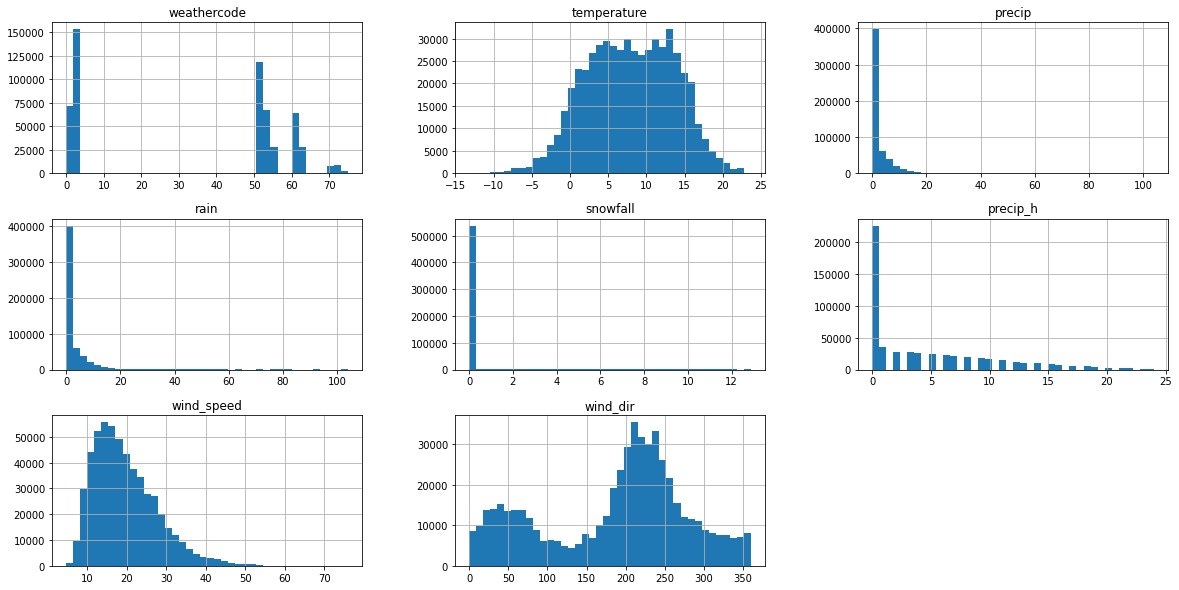

In [73]:
df_weather.hist(figsize=(20,10), bins = 40)

In [83]:
df_weather['city']

0           Brussels
1           Brussels
2           Brussels
3           Brussels
4           Brussels
             ...    
548495    Alveringem
548496    Alveringem
548497    Alveringem
548498    Alveringem
548499    Alveringem
Name: city, Length: 548500, dtype: object

array([[<Axes: xlabel='wind_speed', ylabel='wind_speed'>,
        <Axes: xlabel='precip', ylabel='wind_speed'>,
        <Axes: xlabel='temperature', ylabel='wind_speed'>],
       [<Axes: xlabel='wind_speed', ylabel='precip'>,
        <Axes: xlabel='precip', ylabel='precip'>,
        <Axes: xlabel='temperature', ylabel='precip'>],
       [<Axes: xlabel='wind_speed', ylabel='temperature'>,
        <Axes: xlabel='precip', ylabel='temperature'>,
        <Axes: xlabel='temperature', ylabel='temperature'>]], dtype=object)

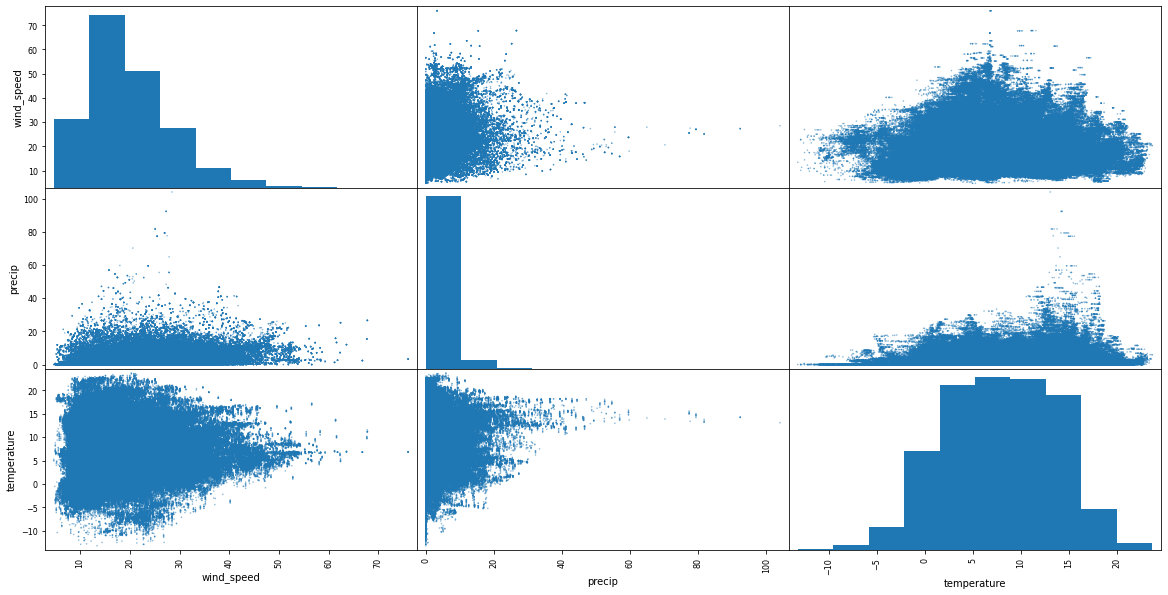

In [100]:
pd.plotting.scatter_matrix(df_weather[['wind_speed', 'precip', 'temperature']], diagonal='hist', alpha=0.5, figsize=(20,10), s=10)

## Get data

In [99]:
from google.colab import files
df_weather.to_csv('weather.csv', index=False)
files.download('weather.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>